# Introduccion Tensorflow

Author: Markus Rabus

Este notebook es una introduccion a tensorflow, parte del curso optativo Vision Computacional de doctorado de intelegencia Artificial.

En este notebook veamos la estructura basica de programas de tensoflow.

Lo primero es importar packetes utilizados.

Keras y TensorFlow son herramientas que se usan para crear modelos de inteligencia artificial.

- TensorFlow es una plataforma desarrollada por Google que permite construir y entrenar modelos de aprendizaje automático. Es muy poderosa y flexible, pero a veces un poco complicada de usar directamente. 

- Keras, por otro lado, es una biblioteca que se construyó encima de TensorFlow para hacerlo más fácil de usar. Keras simplifica muchas tareas complicadas, así que puedes construir modelos sin tener que preocuparte tanto por los detalles técnicos.

In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random


Para empezar quieremos minimizar la función (función de costo):

$J(w) = w^2 - 14 x + 49$


In [2]:
# Definimos la función a minimizar
def func(w):
    return w**2 - 14*w + 49

In [3]:
#Definir la variable w como un tensor de tipo float32 con valor 0
w = tf.Variable(0, dtype=tf.float32)

2024-10-23 22:38:52.424210: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Gradiente descendiente

Despues de definir la variable y la funcion que queremos minimizar (función de costo) tenemos que definir el algoritmo. En este caso usamos el algoritmo gradiente descendiente. Recordamos la funcion de gradiente descente es encontrar nuevos valores para los pesos a traves de encontrar el gradiente.

Actualizamos nuestro valor de $w$ a traves de la siguiente funcion:

$w_{n+1} = w_n - \alpha \frac{\partial L}{\partial w}$

Se actualiza $w$ un cierto numero de iteraciones o hasta converge la funcion hacia el minimo.

Definimos el paso para la optimizacion.

In [4]:
learning_rate = 0.1

def optimization_step():
    # GradientTape es un contexto que registra las operaciones que se realizan sobre los tensores para 
    # calcular el gradiente
    with tf.GradientTape() as tape:
        loss = func(w) # Se calcula el loss de la función usando el valor actual de w
    
    gradients = tape.gradient(loss, [w]) # Se calcula el gradiente de la función con respecto a w
    w.assign_sub(learning_rate * gradients[0])  # Se actualiza el valor de w restando el gradiente 
                                                # multiplicado por el learning rate 
                                                # w = w - learning_rate * gradients[0]
    return loss


In [5]:
#El paso de optimización se repite 10 veces, imprimiendo el valor de w y el loss en cada paso.
for step in range(10):
    loss = optimization_step()
    print(f"Step {step}: w = {w.numpy()}, loss = {loss.numpy()}")

Step 0: w = 1.399999976158142, loss = 49.0
Step 1: w = 2.5199999809265137, loss = 31.35999870300293
Step 2: w = 3.4159998893737793, loss = 20.07040023803711
Step 3: w = 4.132800102233887, loss = 12.84505844116211
Step 4: w = 4.706240177154541, loss = 8.220836639404297
Step 5: w = 5.164992332458496, loss = 5.2613372802734375
Step 6: w = 5.531993865966797, loss = 3.3672561645507812
Step 7: w = 5.825594902038574, loss = 2.1550445556640625
Step 8: w = 6.060475826263428, loss = 1.3792304992675781
Step 9: w = 6.248380661010742, loss = 0.8827018737792969


## Redes neuronales

Empezamos con una red que tiene solo una neurona.

Ahora vamos crear un red neuronal con una neurona y una relacion para mapear $x$ en $y$. Queremos encontrar el patron entre $x$ e $y$ y para esto podemos entrenar una red neuronal simple. Queremos encontrar la regla de las siguientes variables.

`x=[-1., 0., 1., 2., 3., 4.]`

`y=[-7., -2.,  3.,  8., 13., 18.]`

In [6]:
# Usamos numpy para definir los valores de x y y.
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-7.0, -2.0,  3.0,  8.0, 13.0, 18.0], dtype=float)


Usando Keras Sequential API para crear un modelo con una sola neurona y sin bias.

`tf.keras.models.Sequential` se usa para definir una secuencia de capas de la red neuronal. Capas son definidas en secuencia.

`tf.keras.layers.Dense` se usa para definir una capa densa de la red neuronal. El numero de nodos se especifica en el primer argumento y el tamaño de la entrada en el argumento input_shape. 


In [7]:
# keras.models.Sequential se usa para definir una secuencia de capas de la red neuronal. 
model = tf.keras.models.Sequential()

# Anadimos una capa densa con un nodo y sin bias. 
model.add(tf.keras.layers.Dense(1, input_shape=(1,)) )

# Se compila el modelo con el optimizador SGD y la función de pérdida de error cuadrático medio
model.compile(optimizer='sgd', loss='mean_squared_error')  

In [8]:
# Entrenar el modelo con los datos de entrada y salida, epochs=500 significa que se repite 
# el bucle de entrenamiento 500 veces. 
# En cada iteración, el modelo ajusta los pesos para minimizar el error cuadrático medio.
model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
1/1 [==============================] - 0s 351ms/step - loss: 155.5513
Epoch 2/500
1/1 [==============================] - 0s 37ms/step - loss: 123.7819
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 98.7584
Epoch 4/500
1/1 [==============================] - 0s 28ms/step - loss: 79.0430
Epoch 5/500
1/1 [==============================] - 0s 35ms/step - loss: 63.5042
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 51.2520
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 41.5861
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 33.9554
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 27.9266
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 23.1585
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 19.3828
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 16.3884
Epoch 13/500
1/1 [====================

In [9]:
# Despues de entrena el modelo, se puede usar para predecir valores de salida para nuevas entradas.
print(model.predict([7.0]))

1/1 [==============================] - 0s 57ms/step
[[32.97493]]


## Redes convolucionales


Usamos el conjunto de datos "Kaggle Cats and Dogs Dataset"

`wget 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'`

In [47]:
root_dir = '/home/mrabus/ComputerVision/cats_and_dogs_filtered'

entrenamiento_dir = os.path.join(root_dir, 'train')
validacion_dir = os.path.join(root_dir, 'validation')

# Carpeta de entrenamiento
entrenamiento_gato_dir = os.path.join(entrenamiento_dir, 'cats')
entrenamiento_perro_dir = os.path.join(entrenamiento_dir, 'dogs')

# Carpeta de validación
validacion_gato_dir = os.path.join(validacion_dir, 'cats')
validacion_perro_dir = os.path.join(validacion_dir, 'dogs')

# Listar los archivos en los directorios
entrenamiento_gato_fnames = os.listdir(entrenamiento_gato_dir)
entrenamiento_perro_fnames = os.listdir(entrenamiento_perro_dir)

print(f'Gato imagenes de entrenamiento: {len(os.listdir(entrenamiento_gato_dir))}')
print(f'Perro imagenes de entrenamiento: {len(os.listdir(entrenamiento_perro_dir))}')

print(f'Gato imagenes de validacion: {len(os.listdir(validacion_gato_dir))}')
print(f'Pero imagenes de validacion: {len(os.listdir(validacion_perro_dir))}')


Gato imagenes de entrenamiento: 1000
Perro imagenes de entrenamiento: 1000
Gato imagenes de validacion: 500
Pero imagenes de validacion: 500


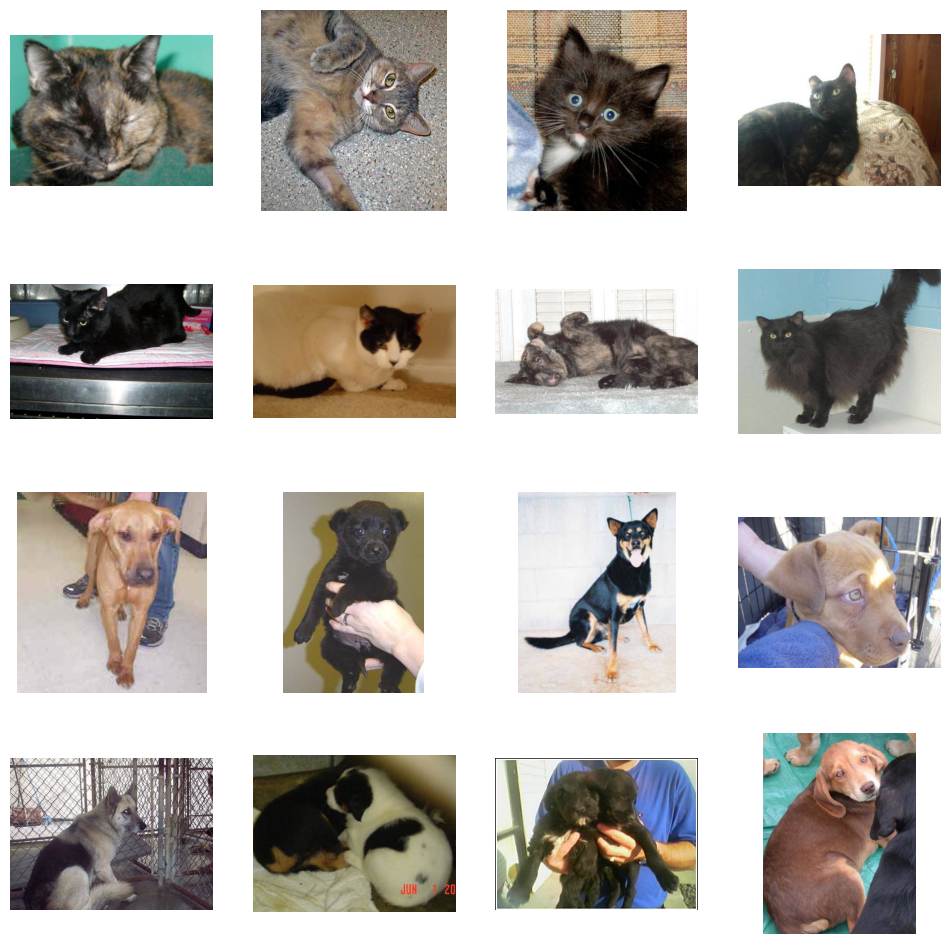

In [24]:
# Mostramos algunas imagenes de gatos y perros
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

gato_pix = [os.path.join(entrenamiento_gato_dir, fname)
                for fname in random.sample(entrenamiento_gato_fnames, k=8)]

perro_pix = [os.path.join(entrenamiento_perro_dir, fname)
                for fname in random.sample(entrenamiento_perro_fnames, k=8)]

for i, img_path in enumerate(gato_pix + perro_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [26]:
model = tf.keras.models.Sequential()

model.add( tf.keras.Input(shape=(150, 150, 3)) )
model.add( tf.keras.layers.Rescaling(1./255) )
model.add( tf.keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( tf.keras.layers.MaxPooling2D(2,2) )
model.add( tf.keras.layers.Conv2D(32, (3,3), activation='relu') )
model.add( tf.keras.layers.MaxPooling2D(2,2) )
model.add( tf.keras.layers.Conv2D(64, (3,3), activation='relu') )
model.add( tf.keras.layers.MaxPooling2D(2,2) )
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense(512, activation='relu') )
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)       

A continuación, configuraremos las especificaciones para el entrenamiento del modelo. Entrenamos el modelo con la pérdida `binary_crossentropy`, porque es un problema de clasificación binaria y ls activación final es una sigmoide. Utilizamos el optimizador `rmsprop` con una tasa de aprendizaje de `0.001`. 
Durante el entrenamiento, querrá controlar la precisión de la clasificación.

In [28]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics = ['accuracy']
    )

In [30]:
conjunto_entrenamiento = tf.keras.utils.image_dataset_from_directory(
    entrenamiento_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    )

conjunto_validacion = tf.keras.utils.image_dataset_from_directory(
    validacion_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    )

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [31]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

conjunto_entrenamiento_final = conjunto_entrenamiento.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
conjunto_validacion_final = conjunto_validacion.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [32]:
entrenamiento = model.fit(
    conjunto_entrenamiento_final,
    epochs=15,
    validation_data=conjunto_validacion_final,
    verbose=2
    )

Epoch 1/15


2024-10-23 23:19:05.323490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2024-10-23 23:19:05.323989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2000]
	 [[{{node Placeholder/_0}}]]
2024-10-23 23:19:30.308104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1000]


100/100 - 29s - loss: 0.7092 - accuracy: 0.5445 - val_loss: 0.6442 - val_accuracy: 0.6080 - 29s/epoch - 288ms/step
Epoch 2/15
100/100 - 27s - loss: 0.6214 - accuracy: 0.6480 - val_loss: 0.7964 - val_accuracy: 0.5680 - 27s/epoch - 267ms/step
Epoch 3/15
100/100 - 27s - loss: 0.5788 - accuracy: 0.6955 - val_loss: 0.5861 - val_accuracy: 0.6890 - 27s/epoch - 270ms/step
Epoch 4/15
100/100 - 27s - loss: 0.5339 - accuracy: 0.7330 - val_loss: 0.6110 - val_accuracy: 0.6740 - 27s/epoch - 270ms/step
Epoch 5/15
100/100 - 32s - loss: 0.4813 - accuracy: 0.7680 - val_loss: 0.5655 - val_accuracy: 0.7080 - 32s/epoch - 316ms/step
Epoch 6/15
100/100 - 35s - loss: 0.4270 - accuracy: 0.7940 - val_loss: 0.6356 - val_accuracy: 0.6720 - 35s/epoch - 353ms/step
Epoch 7/15
100/100 - 33s - loss: 0.3531 - accuracy: 0.8420 - val_loss: 0.5989 - val_accuracy: 0.7210 - 33s/epoch - 334ms/step
Epoch 8/15
100/100 - 31s - loss: 0.2742 - accuracy: 0.8850 - val_loss: 0.7205 - val_accuracy: 0.7100 - 31s/epoch - 314ms/step
Epo

## Predecir modelo




In [35]:
root_prediccion = '/home/mrabus/ComputerVision/gatos_y_perros'
print( os.listdir(root_prediccion) ) 

['help-my-son-with-a-rare-syndrome-YdTCsuj2JAk-unsplash.jpg', 'cat-2083492_1920.jpg']



Es un gato



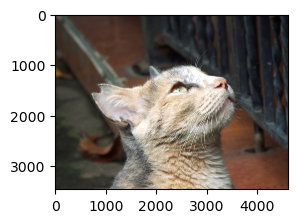

In [44]:
imname = os.path.join(root_prediccion, 'help-my-son-with-a-rare-syndrome-YdTCsuj2JAk-unsplash.jpg')

image = tf.keras.utils.load_img(imname, target_size=(150, 150))
image = tf.keras.utils.img_to_array(image)
image = np.expand_dims(image, axis=0)
    
prediction = model.predict(image, verbose=0)[0][0]
    
if prediction > 0.5:
    print("\nEs un perro\n")
else:
    print("\nEs un gato\n")
    
fig = plt.gcf()
fig.set_size_inches(3, 3)
img = mpimg.imread(imname)
plt.imshow(img)
plt.show()

## Feature maps

1/1 [==============================] - 0s 209ms/step


/tmp/ipykernel_9542/4271517551.py:31: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


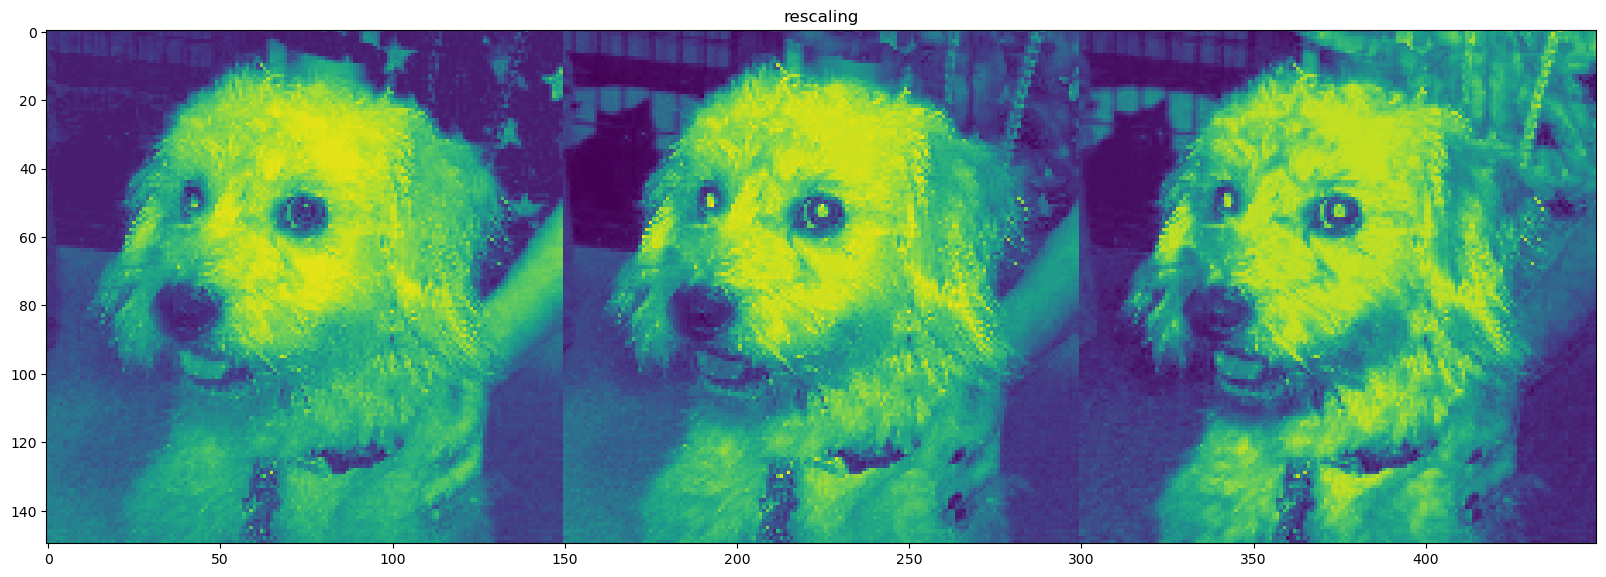

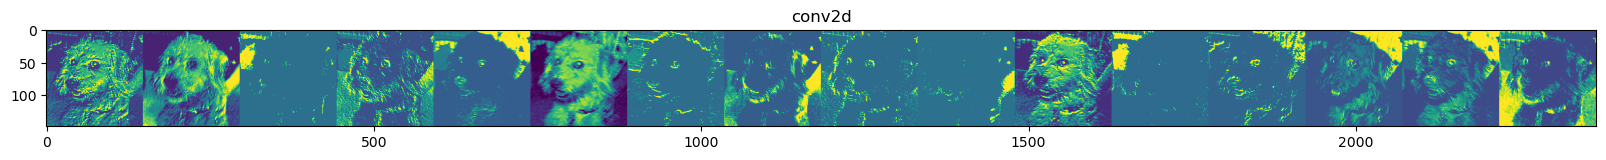

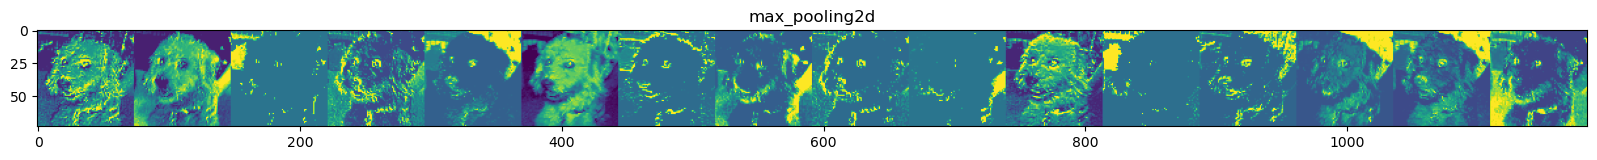

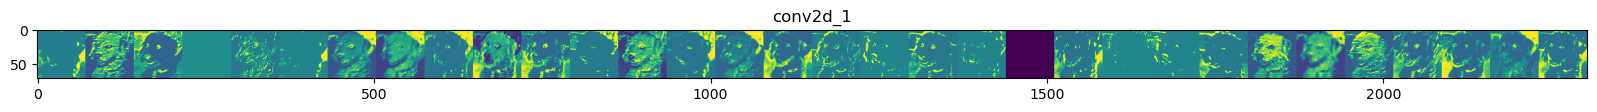

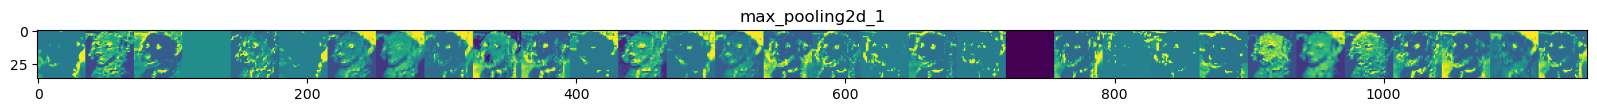

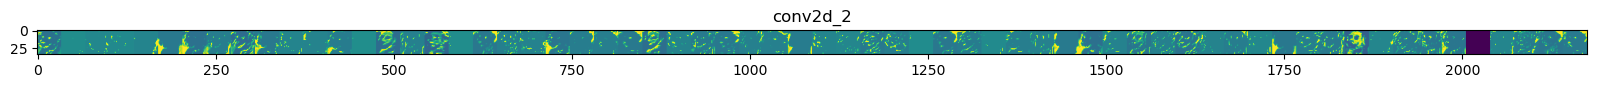

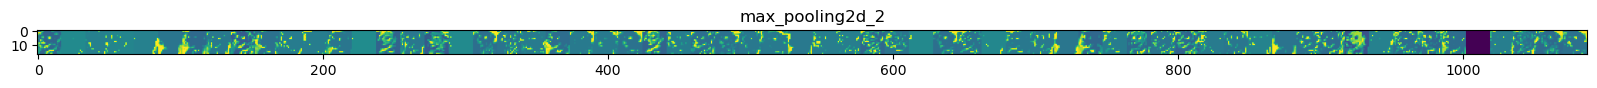

In [49]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

gato_img_files = [os.path.join(entrenamiento_gato_dir, f) for f in entrenamiento_gato_fnames]
perro_img_files = [os.path.join(entrenamiento_perro_dir, f) for f in entrenamiento_perro_fnames]
img_path = random.choice(gato_img_files + perro_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(150, 150))  
x = tf.keras.utils.img_to_array(img) 
x = x.reshape((1,) + x.shape) 

# Corremos la imagen a través de nuestra red, capa por capa
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        # Solo mostramos las capas convolucionales
        n_features = feature_map.shape[-1]  # numeros de features en el feature map
        size = feature_map.shape[1]  # tamaño de cada feature map

        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x 

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

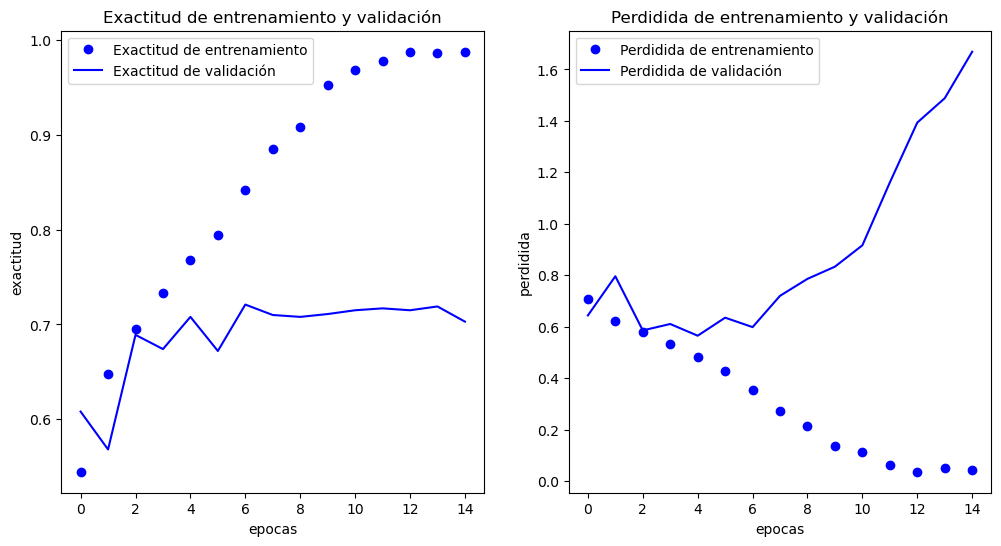

In [50]:
def plot_loss_acc(entrenamiento):
    
    acc = entrenamiento.history['accuracy']
    val_acc = entrenamiento.history['val_accuracy']
    loss = entrenamiento.history['loss']
    val_loss = entrenamiento.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Exactitud de entrenamiento')
    ax[0].plot(epochs, val_acc, 'b', label='Exactitud de validación')
    ax[0].set_title('Exactitud de entrenamiento y validación')
    ax[0].set_xlabel('epocas')
    ax[0].set_ylabel('exactitud')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Perdidida de entrenamiento')
    ax[1].plot(epochs, val_loss, 'b', label='Perdidida de validación')
    ax[1].set_title('Perdidida de entrenamiento y validación')
    ax[1].set_xlabel('epocas')
    ax[1].set_ylabel('perdidida')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(entrenamiento)

El modelo está **sobreajustando**. La precisión de entrenamiento (en azul) se acerca al 100%, mientras que la precisión de validación (línea continua) se estanca en el 70%. La pérdida de validación alcanza su mínimo tras sólo cinco épocas.
Dado que tiene un número relativamente pequeño de ejemplos de entrenamiento (2000), "offerfitting" debería ser la principal preocupación. "overfitting" se produce cuando un modelo expuesto a muy pocos ejemplos aprende patrones que no se generalizan a nuevos datos, es decir, cuando el modelo empieza a utilizar características irrelevantes para hacer predicciones.

## Data Augmentation



In [51]:
# Definir el modo de relleno
FILL_MODE = 'nearest'

# Crear un modelo de data augmentation
data_augmentation = tf.keras.Sequential([
    # Determinar la entrada del modelo
    tf.keras.Input(shape=(150,150,3)),
    # Anadir capas de data augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2,0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.2, fill_mode=FILL_MODE)
    ])

In [62]:
lote = list(conjunto_entrenamiento.take(1))[0][0]
print(f'imagenes por lote: {len(lote)}')

imagenes por lote: 20


2024-10-24 00:38:10.624455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2024-10-24 00:38:10.624909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2000]
	 [[{{node Placeholder/_0}}]]


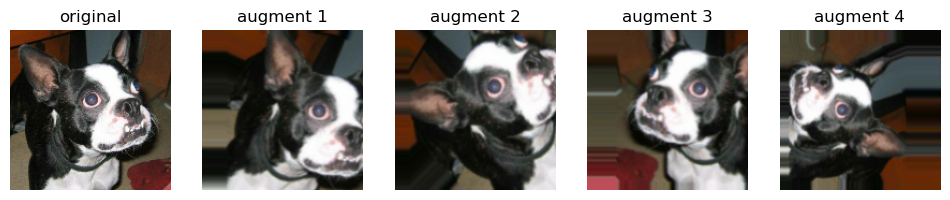

In [63]:
lote_imagen = lote[0]

vistaprevia = []
imagen_pil = tf.keras.utils.array_to_img(lote_imagen)
vistaprevia.append(imagen_pil)

for i in range(4):
    imagen_aug = data_augmentation(tf.expand_dims(lote_imagen, axis=0))
    imagen_aug_pil = tf.keras.utils.array_to_img(tf.squeeze(imagen_aug))
    vistaprevia.append(imagen_aug_pil)
    
fig, axes = plt.subplots(1, 4 + 1, figsize=(12, 12))

for index, ax in enumerate(axes):
    ax.imshow(vistaprevia[index])
    ax.set_axis_off()

    if index == 0:
        ax.set_title('original')
    else:
        ax.set_title(f'augment {index}')

In [64]:
modelo_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [65]:
modelo_aug.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics = ['accuracy']
    )

In [66]:
EPOCHS=80

# Entrar el modelo con data augmentation
entrenamiento_aug = modelo_aug.fit(
      conjunto_entrenamiento_final,
      epochs=EPOCHS,
      validation_data=conjunto_validacion_final,
      verbose=2)

Epoch 1/80
100/100 - 41s - loss: 0.6930 - accuracy: 0.6465 - val_loss: 0.5648 - val_accuracy: 0.7160 - 41s/epoch - 410ms/step
Epoch 2/80
100/100 - 39s - loss: 0.6279 - accuracy: 0.6735 - val_loss: 0.5573 - val_accuracy: 0.6980 - 39s/epoch - 394ms/step
Epoch 3/80
100/100 - 36s - loss: 0.6053 - accuracy: 0.6805 - val_loss: 0.5361 - val_accuracy: 0.7410 - 36s/epoch - 357ms/step
Epoch 4/80
100/100 - 40s - loss: 0.5989 - accuracy: 0.6765 - val_loss: 0.5447 - val_accuracy: 0.7180 - 40s/epoch - 399ms/step
Epoch 5/80
100/100 - 50s - loss: 0.5793 - accuracy: 0.6950 - val_loss: 0.5345 - val_accuracy: 0.7450 - 50s/epoch - 496ms/step
Epoch 6/80
100/100 - 49s - loss: 0.5784 - accuracy: 0.7005 - val_loss: 0.5539 - val_accuracy: 0.7300 - 49s/epoch - 495ms/step
Epoch 7/80
100/100 - 54s - loss: 0.5777 - accuracy: 0.6940 - val_loss: 0.5249 - val_accuracy: 0.7380 - 54s/epoch - 538ms/step
Epoch 8/80
100/100 - 45s - loss: 0.5722 - accuracy: 0.7095 - val_loss: 0.5151 - val_accuracy: 0.7560 - 45s/epoch - 449

In [ ]:
plot_loss_acc(entrenamiento_aug)

## Transfer Learning

`wget https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5`

In [ ]:
# Set the weights file you downloaded into a variable
archive_pesos = '/home/mrabus/ComputerVision/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
# Inicalizar el modelo pre-entrenado
# Configuramos la entrada del modelo y excluimos la capa superior
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape = (150, 150, 3),
    include_top = False,
    weights = None)

# Cargamos los pesos del modelo pre-entrenado
pre_trained_model.load_weights(archivo_pesos)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [ ]:
# Eligir la capa 'mixed7' como la última capa del modelo
ultima_capa = pre_trained_model.get_layer('mixed7')
print('tamano ultima capa: ', ultima_capa.output.shape)
ultima_salida = ultima_capa.output

Tenemos que añadir la capa fully connected. Ademas añadimos Dropout para regularizar.

In [ ]:

x = tf.keras.layers.Flatten()(ultima_salida)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense  (1, activation='sigmoid')(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.summary()

Tenemos que preprocesar nuestros imagenes para se puede usar con el modelo de transfer learning

In [ ]:
def preprocess(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

entrenamiento_scaled = conjunto_entrenamiento.map(preprocess)
validacion_scaled = conjunto_validacion.map(preprocess)

In [ ]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

conjunto_entrenamiento_final = (entrenamiento_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

conjunto_validacion_final = (validacion_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2),
    ])

In [ ]:
inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = model(x)

model_aug = tf.keras.Model(inputs, x)

In [ ]:
model_aug.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [ ]:
EPOCHS = 20

entrenamiento = model_aug.fit(
    conjunto_entrenamiento_final,
    validation_data = conjunto_validacion_final,
    epochs = EPOCHS,
    verbose = 2)

In [ ]:
plot_loss_acc(entrenamiento)